# **Book Recommendation System — Collaborative Filtering & Content-Based Approaches**

**Author:** Milos Saric [https://saricmilos.com/]  
**YOUTUBE:** English: @realskillsoverdegrees ; Serbian: @realskilloverdegree  
**Date:** November 04, 2025 - November 18th, 2025 
**Dataset:** Kaggle — *Book Recommendation Dataset*  
[https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)

---

This notebook explores the Kaggle Book Recommendation dataset to build intelligent book recommendation systems using both **collaborative filtering** and **content-based** techniques.  
The analysis will guide you through the complete data science workflow, including:

1. **Problem Definition** – Define the recommendation goal: predicting user preferences and suggesting books they are most likely to enjoy. Establish appropriate evaluation metrics (Precision@K, Recall@K, RMSE for ratings prediction, etc.).  

2. **Data Collection & Overview** – Load and inspect datasets including `Books`, `Users`, and `Ratings` from Kaggle. Understand data structure, relationships, and key features (book titles, authors, ISBNs, user demographics).  

3. **Exploratory Data Analysis (EDA)** – Analyze rating distributions, user activity, popular books, and correlations between users and items. Visualize key insights through plots and word clouds.  

4. **Data Preprocessing & Feature Engineering** – Clean and merge datasets, handle missing values, normalize user IDs, and extract relevant metadata (genres, publication years, etc.).  

5. **Model Development** –  
   - **Collaborative Filtering:** User-based and item-based similarity models using cosine or Pearson correlation.  
   - **Matrix Factorization:** SVD, NMF, or ALS to learn latent user–item representations.  
   - **Content-Based Filtering:** Use TF-IDF or embeddings on book metadata (titles, authors, or summaries) to find similar books.  
   - **Hybrid Models:** Combine collaborative and content-based signals for improved personalization.  

6. **Evaluation & Testing** – Evaluate recommendation quality using cross-validation and ranking-based metrics. Compare different approaches and interpret the top recommended books for sample users.  

7. **Deployment & Future Work** – Outline strategies to deploy the recommendation engine (e.g., via Flask/FastAPI) and improve it with deep learning, contextual data, or reinforcement learning.

---

**Objective:**  
To develop a personalized **book recommendation system** capable of understanding user preferences and providing meaningful, data-driven suggestions by integrating collaborative and content-based approaches.

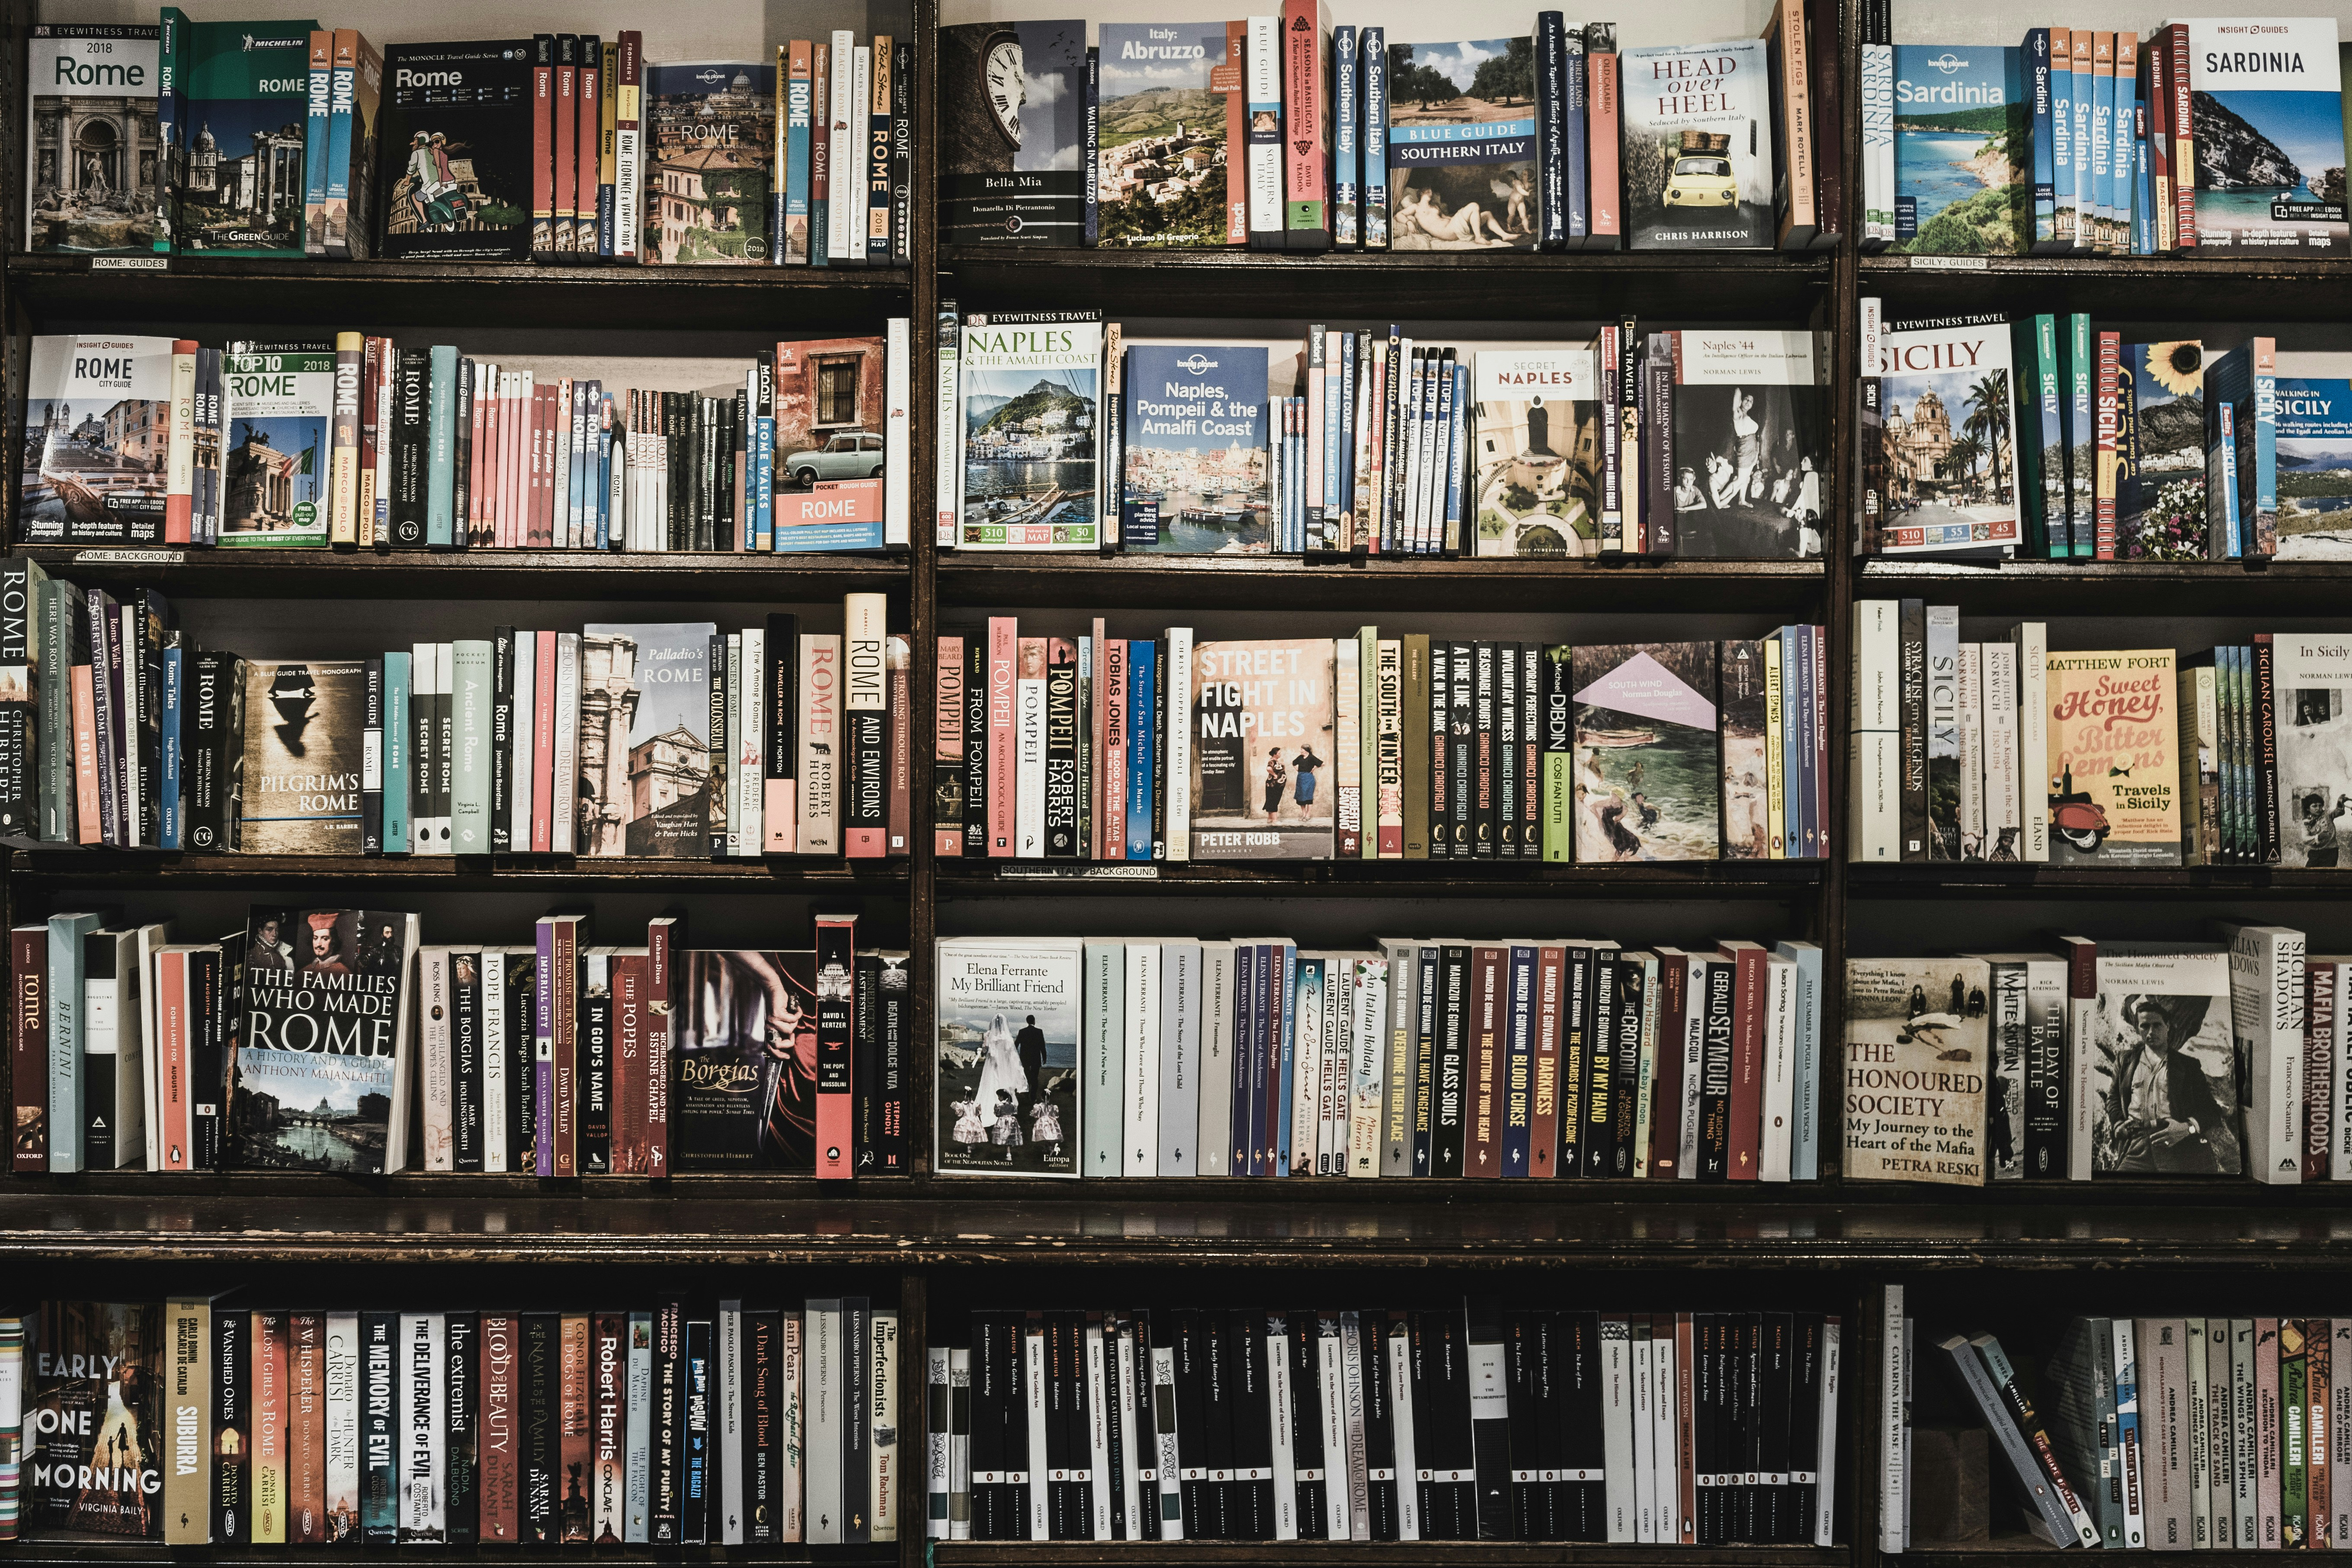

In [1]:
from IPython.display import Image

Image(filename=r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\images\books_intro.jpg")

# **About Recommender Systems**

Over the past few decades, platforms like YouTube, Amazon, and Netflix have made recommender systems an essential part of our online experience. Whether it’s suggesting movies to watch, products to buy, or articles to read, these systems help users discover content that matches their interests.

In simple terms, a recommender system is an algorithm that predicts what a user might like based on their preferences and behavior. They play a key role in many industries, not only improving user experience but also driving significant revenue and helping companies stand out from the competition.

---

## **1. Problem Definition**

The first step is to establish a clear understanding of the challenge we aim to solve. This phase lays the groundwork for the entire project and ensures all subsequent efforts remain aligned with the primary objective.

### **Objective**
Develop a **book recommendation system** that predicts and suggests books users are most likely to enjoy, based on their past interactions, ratings, and preferences.  
The system should intelligently recommend books by leveraging techniques such as **collaborative filtering**, **content-based filtering**, or a **hybrid approach**.

### **Scope**
The analysis focuses on the Kaggle *Book Recommendation Dataset*, which includes three key components:  
- **Users** – demographic and identification information.  
- **Books** – metadata such as titles, authors, and publication details.  
- **Ratings** – explicit user feedback (ratings from 1–10).  

Predictions and recommendations are restricted to the dataset provided, without external sources (e.g., Goodreads API or user reviews) unless explicitly integrated in advanced phases.

### **Stakeholders**
- **Readers / Users:** Receive personalized book suggestions based on reading habits and preferences.  
- **Publishers & Authors:** Gain insights into reader interests, helping target audiences more effectively.  
- **Data Scientists / ML Practitioners:** Experiment with various recommendation algorithms and performance optimization.  
- **Platform Developers / Businesses:** Improve user engagement, sales, retention, and satisfaction through smarter recommendations.  

### **Success Criteria**
Achieve **high-quality and personalized recommendations**, evaluated using metrics such as:  
- **Precision@K** and **Recall@K** — to measure recommendation relevance.  
- **RMSE / MAE** — for explicit rating prediction accuracy.  
- **User Satisfaction / Engagement Rate** — qualitative indicators of recommendation effectiveness.  

A successful model will deliver **relevant, diverse, and accurate book suggestions** that enhance user experience and foster long-term engagement.

> A clearly defined problem sets the foundation for building a meaningful and effective recommendation system.

## **2. Data Collection**

The **Data Collection** phase focuses on gathering and preparing the datasets required to build and evaluate the book recommendation models. This step also involves importing essential libraries, setting up the working environment, and organizing reusable functions to ensure a smooth analysis workflow.

For this project, the dataset provides detailed information about books, users, and their ratings — forming the foundation for building both **collaborative** and **content-based** recommender systems.

## **Dataset Description**

The **Book-Crossing Dataset** comprises three main files: **Users**, **Books**, and **Ratings**.  
Each file contains essential information used to build and evaluate the book recommendation system.

---

### **1. Users**

Contains user-related information.  
- **User-ID** — Anonymized unique identifier for each user (mapped to integers).  
- **Location** — User’s location information (typically “City, State, Country”).  
- **Age** — User’s age (if available).  

> Note: Some demographic fields may contain `NULL` values if data was unavailable.

---

### **2. Books**

Contains metadata for each book.  
- **ISBN** — Unique book identifier (invalid ISBNs have already been removed).  
- **Book-Title** — Title of the book.  
- **Book-Author** — Author name (only the first author is provided in multi-author cases).  
- **Year-Of-Publication** — Year the book was published.  
- **Publisher** — Publishing company.  
- **Image-URL-S / M / L** — URLs linking to small, medium, and large cover images hosted on Amazon.

> Content-based features such as book titles, authors, and publication years were obtained from **Amazon Web Services**.  

---

### **3. Ratings**

Contains user–book interaction data.  
- **User-ID** — References a unique user.  
- **ISBN** — References a unique book.  
- **Book-Rating** — Explicit or implicit feedback:  
  - **1–10** → Explicit ratings (higher values indicate stronger preference).  
  - **0** → Implicit feedback (user has interacted but not rated explicitly).

---

You can access the dataset through the following sources:

- **1.** Download directly from the Github repository: [https://github.com/saricmilos/what-else-should-I-read/tree/main/datasets](https://github.com/saricmilos/what-else-should-I-read/tree/main/datasets)  
- **2.** Download from Kaggle: [Book Recommendation Dataset — Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data)  

Both sources provide the same data, so you can use whichever is most convenient for your workflow.

> This dataset serves as the backbone of the recommendation system, enabling the discovery of patterns between users and books, and supporting the development of intelligent, personalized recommendation algorithms.

### **Starter Kernel(s)**

This dataset serves as the foundation for building both **collaborative filtering** and **content-based** recommendation models.  
You can begin by:
1. Loading each dataset (`Users`, `Books`, `Ratings`) individually.  
2. Performing exploratory data analysis (EDA) to understand distributions and missing values.  
3. Merging the datasets to form a unified view of user–book interactions.  
4. Building and evaluating different recommendation approaches. 

### Required Libraries Import

In [86]:
%load_ext autoreload
%autoreload 2

# Modules
from src.dataloader import load_all_csvs_from_folder
from src.preprocess_location import preprocess_location
from src.missing_values import (
    missing_values_heatmap,
    missing_values_barchart,
    get_missing_value_summary
    )
from src.unique_values import (
    get_column_types,
    plot_number_of_unique_values,
    unique_values
    )
from src.plots import (
    plot_top_categories,
    plot_boxplot,
    plot_histogram
    )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Core
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Datasets

In [4]:
dataset_folder = Path(r"C:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\datasets")

In [5]:
datasets = load_all_csvs_from_folder(dataset_folder)

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\dataloader.py:63: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  datasets[csv_file.stem] = pd.read_csv(csv_file, **read_csv_kwargs)


In [6]:
print(f"{datasets.keys()}")

dict_keys(['Books', 'Ratings', 'Users'])


In [7]:
books_df = datasets.get("Books")
ratings_df = datasets.get("Ratings")
users_df = datasets.get("Users")

# Initial Feature Engineering

In [8]:
original_users_df = users_df

In [9]:
country_mapping = {
    # USA variants
    'usa': 'usa', 'u.s.a.': 'usa', 'us': 'usa', 'america': 'usa', 'u.s.a': 'usa',
    'united states': 'usa', 'united states of america': 'usa', 'united state': 'usa', 
    'united statea': 'usa', 'u.s. of a.': 'usa', 'u.s>': 'usa', 'uusa': 'usa',
    'usa now': 'usa', 'good old usa !': 'usa', 'good old u.s.a.': 'usa',
    'usa (currently living in england)': 'usa', 'usa"': 'usa', 'us virgin islands': 'usa',
    'american samoa': 'usa', 'ca': 'usa', 'nyc': 'usa', 'fl': 'usa', 'tx': 'usa',
    'arizona': 'usa', 'california': 'usa', 'new york': 'usa', 'massachusetts': 'usa',
    'ohio': 'usa', 'colorado': 'usa', 'michigan': 'usa', 'virginia': 'usa',
    'washington': 'usa', 'missouri': 'usa', 'pennsylvania': 'usa', 'illinois': 'usa',
    'nevada': 'usa', 'florida': 'usa', 'north carolina': 'usa', 'south carolina': 'usa',
    'west virginia': 'usa', 'maine': 'usa', 'minnesota': 'usa', 'montana': 'usa',
    'new jersey': 'usa', 'hawaii': 'usa', 'alaska': 'usa', 'texas': 'usa',
    'louisiana': 'usa', 'oh': 'usa', 'nj': 'usa', 'ny': 'usa', 'va': 'usa',
    'pa': 'usa', 'arizona': 'usa', 'florida': 'usa', 'mi': 'usa', 'california': 'usa',
    'anystate': 'usa', 'everywhere and anywhere': 'usa', 'land of the free': 'usa',
    
    # UK variants
    'uk': 'united kingdom', 'u.k.': 'united kingdom', 'england': 'united kingdom',
    'england uk': 'united kingdom', 'united kingdom': 'united kingdom', 'scotland': 'united kingdom',
    'wales': 'united kingdom', 'northern ireland': 'united kingdom',
    
    # Germany variants
    'germany': 'germany', 'deutschland': 'germany', 'germay': 'germany', 'deutsches reich': 'germany',
    'baden-wuerttemberg': 'germany', 'baden-württemberg': 'germany', 'hessen': 'germany',
    'rheinland-pfalz': 'germany', 'bayern': 'germany', 'berlin': 'germany',
    
    # Spain variants
    'spain': 'spain', 'españa': 'spain', 'espana': 'spain', 'espã±a': 'spain', 
    'spain"': 'spain', 'andalucia': 'spain', 'catalunya': 'spain', 'catalonia': 'spain',
    'pais vasco': 'spain', 'valtesse': 'spain', 'laos': 'spain', 'aragon': 'spain',
    
    # Italy variants
    'italy': 'italy', 'italia': 'italy', 'l`italia': 'italy', 'italien': 'italy',
    'italy"': 'italy', 'emilia romagna': 'italy', 'lazio': 'italy', 'sicilia': 'italy',
    'veneto': 'italy', 'toscana': 'italy', 'piemonte': 'italy', 'roma': 'italy', 'milano': 'italy',
    'prov. di milano': 'italy', 'trentino alto adige': 'italy', 'roma': 'italy',
    
    # France variants
    'france': 'france', 'la france': 'france', 'france"': 'france', 'ile de france': 'france',
    'bourgogne': 'france', 'alsace': 'france',
    
    # Portugal variants
    'portugal': 'portugal', 'portugal"': 'portugal', 'alentejo': 'portugal',
    'lisboa': 'portugal', 'porto': 'portugal', 'coimbra': 'portugal', 'azores': 'portugal',
    
    # China variants
    'china': 'china', 'p.r.china': 'china', 'p.r. china': 'china', 'people`s republic of china': 'china',
    'china people`s republic': 'china', 'cn': 'china', 'china"': 'china', 'beijing': 'china',
    'shanghai': 'china', 'liaoning': 'china', 'shanxi province': 'china', 'hubei province': 'china',
    'hunan': 'china', 'guangdong': 'china', 'shandong province': 'china', 'hebei': 'china',
    
    # Australia variants
    'australia': 'australia', 'autralia': 'australia', 'australii': 'australia',
    'australian capital territory': 'australia', 'new south wales': 'australia', 'nsw': 'australia',
    'victoria': 'australia', 'queensland': 'australia', 'western australia': 'australia',
    'south australia': 'australia', 'tasmania': 'australia', 'canberra': 'australia',
    
    # India variants
    'india': 'india', 'india"': 'india', 'maharashtra': 'india', 'maharastra': 'india',
    'jharkhand': 'india', 'punjab': 'india', 'tamil nadu': 'india', 'indiai': 'india',
    
    # Japan variants
    'japan': 'japan', 'japan military': 'japan', 'japan"': 'japan', 'tokyo': 'japan',
    'osaka': 'japan', 'seoul korea': 'japan', 'shizuoka pref.': 'japan',
    
    # Misc / Other countries (examples)
    'canada': 'canada', 'british columbia': 'canada', 'ontario': 'canada', 'newfoundland': 'canada',
    'mexico': 'mexico', 'mexico"': 'mexico', 'ciudad de mexico': 'mexico', 'nuevo leon': 'mexico',
    'venezuela': 'venezuela', 'venezuela"': 'venezuela', 'brazil': 'brazil', 'brasil': 'brazil',
    'brazil"': 'brazil', 'argentina': 'argentina', 'la argentina': 'argentina', 'argentina"': 'argentina',
    'germany"': 'germany', 'deutschland"': 'germany', 'spain"': 'spain',
    'south korea': 'south korea', 'south korea"': 'south korea', 'korea': 'south korea', 's.corea': 'south korea',
    
    # Catch all N/A or unknown
    'n/a': 'unknown', 'n/a"': 'unknown', 'none': 'unknown', 'unknown': 'unknown', '"': 'unknown', '-': 'unknown',
    '.': 'unknown', '*': 'unknown',
}

In [10]:
region_mapping = {
    # North America
    'usa': 'North America',
    'canada': 'North America',
    'mexico': 'North America',
    'bahamas': 'North America',
    'puerto rico': 'North America',
    'bermuda': 'North America',
    'dc': 'North America',
    'oregon': 'North America',  # US state
    'u.s.a': 'North America',
    
    # Central America & Caribbean
    'costa rica': 'Central America',
    'panama': 'Central America',
    'guatemala': 'Central America',
    'jamaica': 'Caribbean',
    'trinidad and tobago': 'Caribbean',
    'dominican republic': 'Caribbean',
    'grenada': 'Caribbean',
    'barbados': 'Caribbean',
    
    # South America
    'brazil': 'South America',
    'argentina': 'South America',
    'chile': 'South America',
    'colombia': 'South America',
    'peru': 'South America',
    'venezuela': 'South America',
    'bolivia': 'South America',
    'uruguay': 'South America',
    'ecuador': 'South America',
    'paraguay': 'South America',
    'urugua': 'South America',  # typo
    
    # Europe
    'united kingdom': 'Europe',
    'germany': 'Europe',
    'spain': 'Europe',
    'italy': 'Europe',
    'france': 'Europe',
    'portugal': 'Europe',
    'netherlands': 'Europe',
    'switzerland': 'Europe',
    'sweden': 'Europe',
    'finland': 'Europe',
    'belgium': 'Europe',
    'ireland': 'Europe',
    'poland': 'Europe',
    'greece': 'Europe',
    'romania': 'Europe',
    'croatia': 'Europe',
    'slovakia': 'Europe',
    'czech republic': 'Europe',
    'russia': 'Europe/Asia',
    'yugoslavia': 'Europe',
    'slovenia': 'Europe',
    'luxembourg': 'Europe',
    'hungary': 'Europe',
    'iceland': 'Europe',
    'andorra': 'Europe',
    'ukraine': 'Europe',
    'lithuania': 'Europe',
    'latvia': 'Europe',
    'malta': 'Europe',
    'albania': 'Europe',
    'macedonia': 'Europe',
    'cyprus': 'Europe',
    'belarus': 'Europe',
    'estonia': 'Europe',
    'austria': 'Europe',
    'austria"': 'Europe',  # in case of trailing quotes
    
    # Asia
    'china': 'Asia',
    'japan': 'Asia',
    'south korea': 'Asia',
    'taiwan': 'Asia',
    'hong kong': 'Asia',
    'india': 'Asia',
    'malaysia': 'Asia',
    'singapore': 'Asia',
    'philippines': 'Asia',
    'indonesia': 'Asia',
    'pakistan': 'Asia',
    'iran': 'Asia',
    'thailand': 'Asia',
    'vietnam': 'Asia',
    'nepal': 'Asia',
    'kazakhstan': 'Asia',
    'afghanistan': 'Asia',
    'brunei': 'Asia',
    'u.a.e': 'Middle East',
    'united arab emirates': 'Middle East',
    'qatar': 'Middle East',
    'kuwait': 'Middle East',
    'bahrain': 'Middle East',
    'oman': 'Middle East',
    'iraq': 'Middle East',
    'sri lanka': 'Asia',
    'burma': 'Asia',
    
    # Africa
    'south africa': 'Africa',
    'ghana': 'Africa',
    'egypt': 'Africa',
    'algeria': 'Africa',
    'kenya': 'Africa',
    'zimbabwe': 'Africa',
    'ethiopia': 'Africa',
    'mozambique': 'Africa',
    'benin': 'Africa',
    'morocco': 'Africa',
    'mauritius': 'Africa',
    
    # Oceania
    'australia': 'Oceania',
    'new zealand': 'Oceania',
    'fiji': 'Oceania',
    
    # Other / Unknown / Misc
    'unknown': 'Unknown',
    'other': 'Unknown',
    'antarctica': 'Other',
    'east africa': 'Africa',
    'caribbean sea': 'Other',
    'euskal herria': 'Europe',  # Basque Country (Spain/France)
}


In [11]:
users_df = preprocess_location(users_df,country_mapping=country_mapping,region_mapping=region_mapping,top_cities= 50,top_states= 50)

Common situation with user-entered location data: lots of typos, alternate spellings, subregions, and single-entry “countries.” simplify and group rare/ambiguous values.

In [12]:
users_df.head()

User-ID                            Location   Age   Country_Clean  \
0        1                  nyc, new york, usa   NaN             usa   
1        2           stockton, california, usa  18.0             usa   
2        3     moscow, yukon territory, russia   NaN          russia   
3        4           porto, v.n.gaia, portugal  17.0        portugal   
4        5  farnborough, hants, united kingdom   NaN  united kingdom   

          Region City_Clean State_Clean  
0  North America      Other    new york  
1  North America      Other  california  
2    Europe/Asia      Other       Other  
3         Europe      Other       Other  
4         Europe      Other       Other

##  **3. Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is all about **understanding the dataset**, uncovering patterns, spotting anomalies, and generating insights that will guide feature engineering and modeling.

## 3.1. Datasets Basic Information

### 3.1.1. Books Dataset

In [13]:
books_df.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [14]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
books_df.describe()

ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/155936078X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/155936078X.0...   
freq                                                    2   

                                              Image-URL-L  
count                                              271357  
unique                                             271041  
top     http://images.amazon.com/images/P/155936078X.0...  
freq                                                    2

### 3.1.2. Ratings Dataset

In [16]:
ratings_df.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

In [17]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
ratings_df.describe()

User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01

### 3.1.3. Users Dataset

In [19]:
users_df.head()

User-ID                            Location   Age   Country_Clean  \
0        1                  nyc, new york, usa   NaN             usa   
1        2           stockton, california, usa  18.0             usa   
2        3     moscow, yukon territory, russia   NaN          russia   
3        4           porto, v.n.gaia, portugal  17.0        portugal   
4        5  farnborough, hants, united kingdom   NaN  united kingdom   

          Region City_Clean State_Clean  
0  North America      Other    new york  
1  North America      Other  california  
2    Europe/Asia      Other       Other  
3         Europe      Other       Other  
4         Europe      Other       Other

In [20]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   User-ID        278858 non-null  int64  
 1   Location       278858 non-null  object 
 2   Age            168096 non-null  float64
 3   Country_Clean  278858 non-null  object 
 4   Region         278858 non-null  object 
 5   City_Clean     278858 non-null  object 
 6   State_Clean    278858 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 14.9+ MB


Maximum Age is 244.000000, meaning there are outliers to be adressed

In [21]:
users_df.describe()

User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

In [22]:
shapes = pd.DataFrame({
    "Dataset": ["books_df", "ratings_df","users_df"],
    "Shape": [books_df.shape, ratings_df.shape,users_df.shape]
})
print(shapes.to_string(index=False))

   Dataset        Shape
  books_df  (271360, 8)
ratings_df (1149780, 3)
  users_df  (278858, 7)


In [23]:
ratings_df.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

## 3.2. Missing Values

### 3.2.1. Books Dataset

In [24]:
na_counts_books = books_df.isna().sum().reset_index()
na_counts_books.columns = ['Feature', 'MissingValues']

In [25]:
print(f"{na_counts_books}")

               Feature  MissingValues
0                 ISBN              0
1           Book-Title              0
2          Book-Author              2
3  Year-Of-Publication              0
4            Publisher              2
5          Image-URL-S              0
6          Image-URL-M              0
7          Image-URL-L              3


In [26]:
get_missing_value_summary(books_df)

Column   Dtype  TotalValues  MissingValues  NonMissingValues  \
0                 ISBN  object       271360              0            271360   
1           Book-Title  object       271360              0            271360   
2          Book-Author  object       271360              2            271358   
3  Year-Of-Publication  object       271360              0            271360   
4            Publisher  object       271360              2            271358   
5          Image-URL-S  object       271360              0            271360   
6          Image-URL-M  object       271360              0            271360   
7          Image-URL-L  object       271360              3            271357   

   MissingPercent  
0        0.000000  
1        0.000000  
2        0.000737  
3        0.000000  
4        0.000737  
5        0.000000  
6        0.000000  
7        0.001106

In [27]:
missing_values_barchart(books_df,"Books")

Image-URL-L    0.001106
Book-Author    0.000737
Publisher      0.000737
dtype: float64

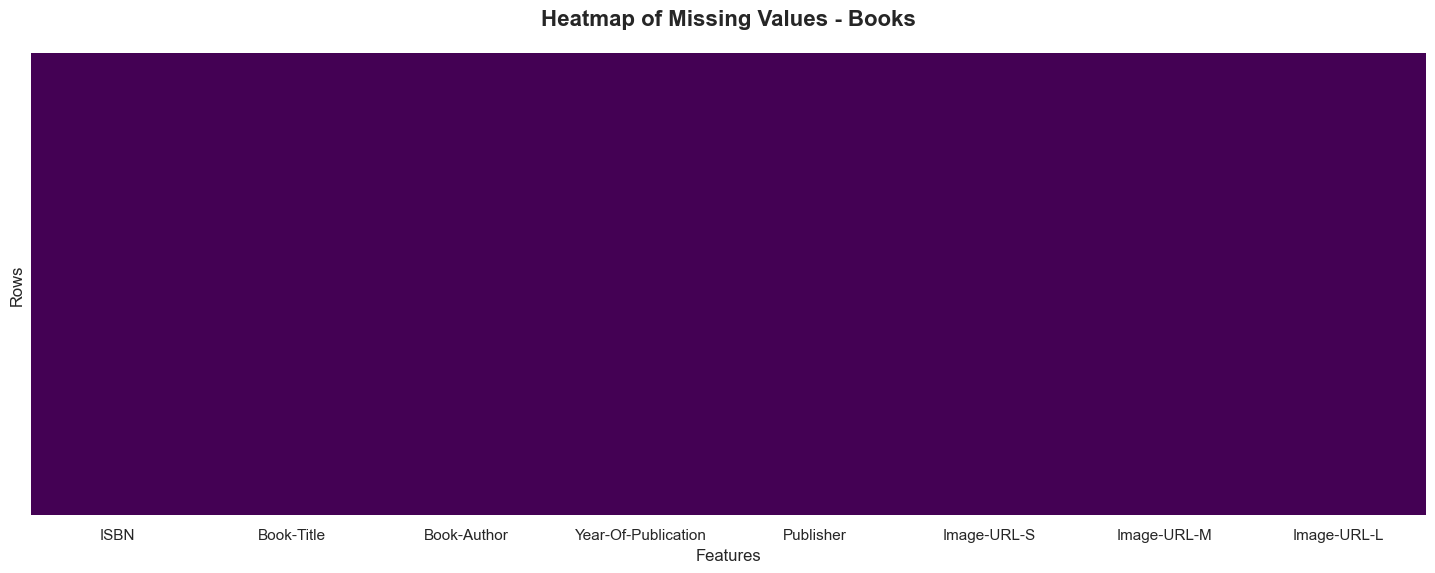

In [28]:
missing_values_heatmap(books_df,"Books") # Stavi mapu sta je plavo sta je zuto

### 3.2.2. Ratings Dataset

In [29]:
na_counts_ratings = ratings_df.isna().sum().reset_index()
na_counts_ratings.columns = ['Feature', 'MissingValues']

In [30]:
print(f"{na_counts_ratings}")

       Feature  MissingValues
0      User-ID              0
1         ISBN              0
2  Book-Rating              0


In [31]:
get_missing_value_summary(ratings_df)

Column   Dtype  TotalValues  MissingValues  NonMissingValues  \
0      User-ID   int64      1149780              0           1149780   
1         ISBN  object      1149780              0           1149780   
2  Book-Rating   int64      1149780              0           1149780   

   MissingPercent  
0             0.0  
1             0.0  
2             0.0

### 3.2.3. Users Dataset

In [32]:
na_counts_users = ratings_df.isna().sum().reset_index()
na_counts_users.columns = ['Feature', 'MissingValues']

In [33]:
print(f"{na_counts_users}")

       Feature  MissingValues
0      User-ID              0
1         ISBN              0
2  Book-Rating              0


In [34]:
get_missing_value_summary(users_df)

Column    Dtype  TotalValues  MissingValues  NonMissingValues  \
0        User-ID    int64       278858              0            278858   
1       Location   object       278858              0            278858   
2            Age  float64       278858         110762            168096   
3  Country_Clean   object       278858              0            278858   
4         Region   object       278858              0            278858   
5     City_Clean   object       278858              0            278858   
6    State_Clean   object       278858              0            278858   

   MissingPercent  
0        0.000000  
1        0.000000  
2       39.719857  
3        0.000000  
4        0.000000  
5        0.000000  
6        0.000000

In [35]:
missing_values_heatmap(users_df,"Users")

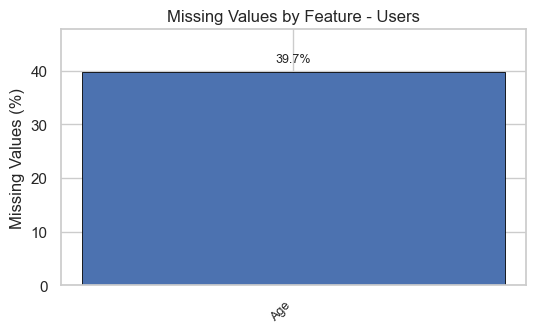

Age    39.719857
dtype: float64

In [36]:
missing_values_barchart(users_df,"Users")

# 3.3. Unique Values

### 3.3.1. Books Dataset

In [37]:
cat_cols_books, int_cols_books, float_cols_books = get_column_types(books_df)

Categorical variables:
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

Integer variables:
[]

Real (float) variables:
[]


In [38]:
unique_values(books_df)

Column  UniqueValues  TotalValues  UniquePercent
0                 ISBN        271360       271360         100.00
1          Image-URL-S        271044       271360          99.88
2          Image-URL-M        271044       271360          99.88
3          Image-URL-L        271041       271360          99.88
4           Book-Title        242135       271360          89.23
5          Book-Author        102022       271360          37.60
6            Publisher         16807       271360           6.19
7  Year-Of-Publication           202       271360           0.07

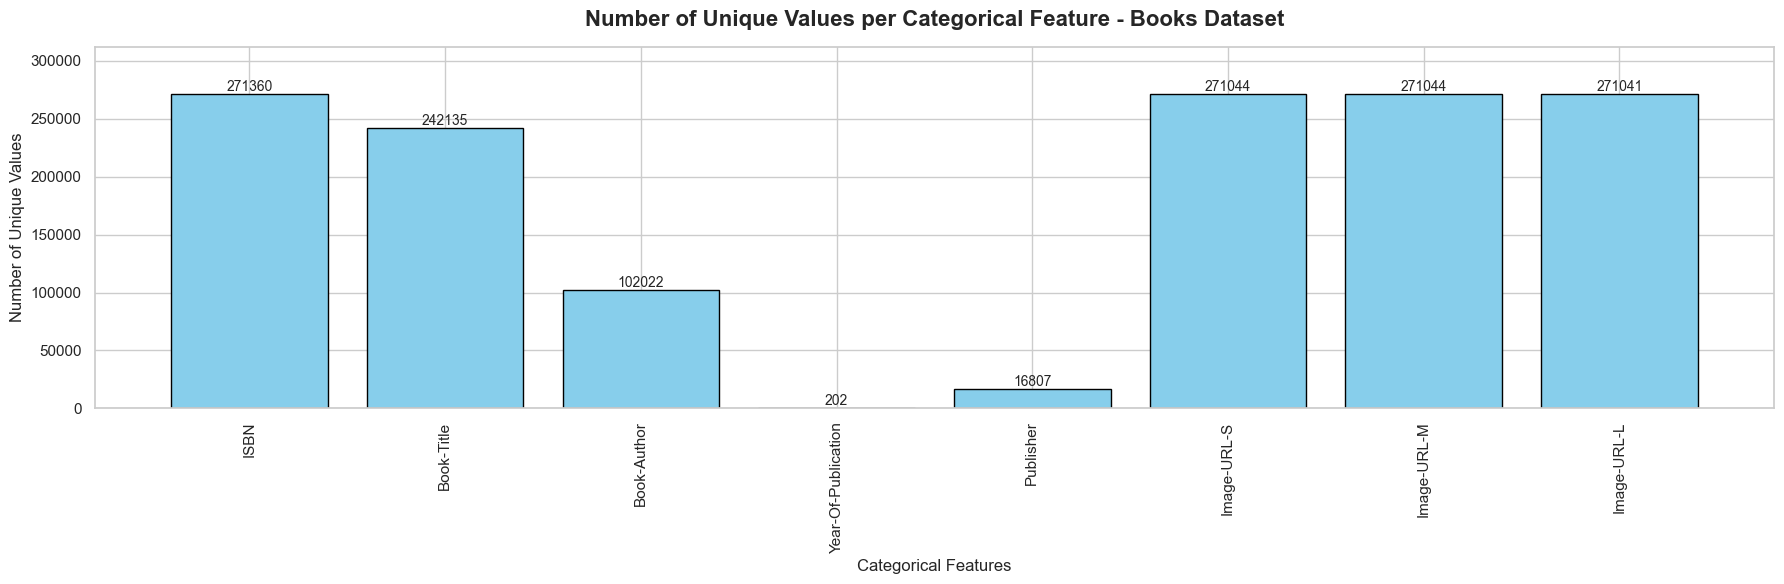

In [39]:
plot_number_of_unique_values(books_df,cat_cols_books,"Books Dataset")

### 3.3.2. Ratings Dataset

In [40]:
cat_cols_ratings, int_cols_ratings, float_cols_ratings = get_column_types(ratings_df)

Categorical variables:
['ISBN']

Integer variables:
['User-ID', 'Book-Rating']

Real (float) variables:
[]


In [41]:
unique_values(ratings_df)

Column  UniqueValues  TotalValues  UniquePercent
0         ISBN        340556      1149780          29.62
1      User-ID        105283      1149780           9.16
2  Book-Rating            11      1149780           0.00

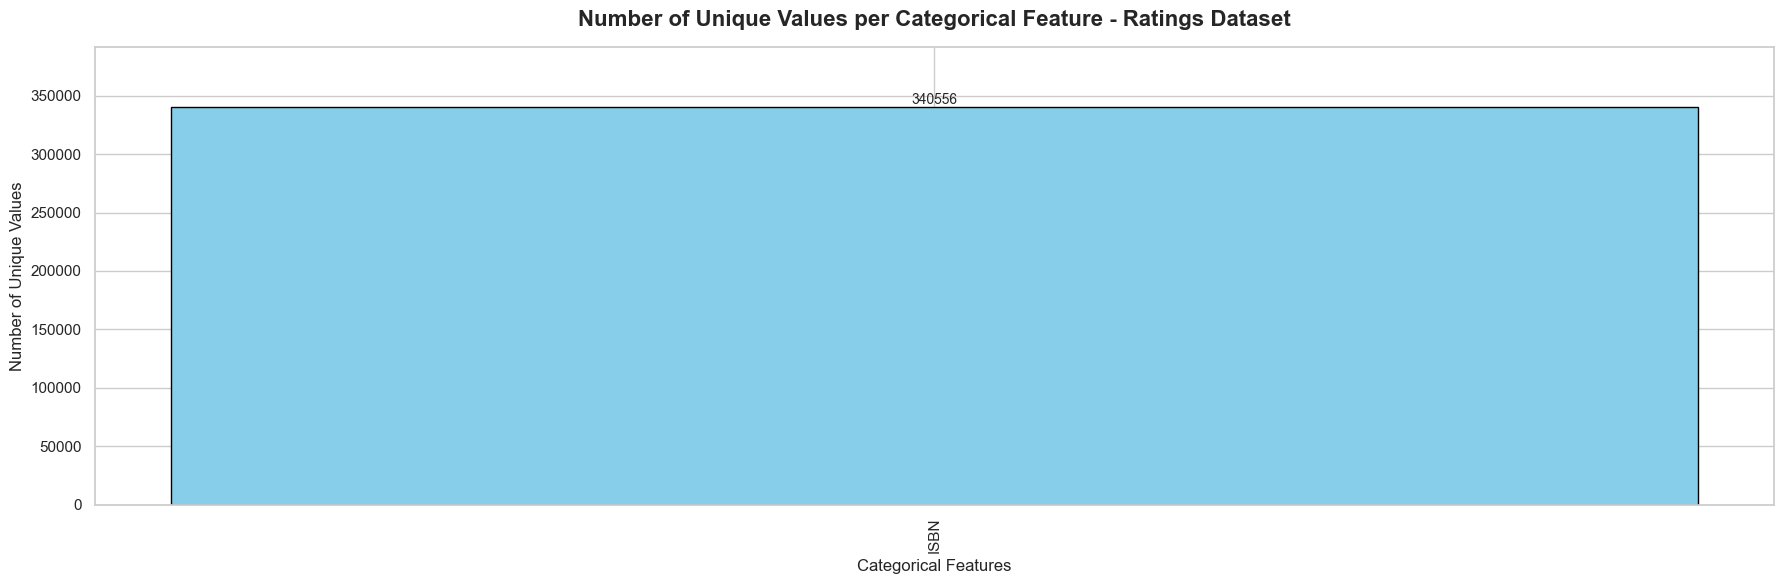

In [42]:
plot_number_of_unique_values(ratings_df,cat_cols_ratings,"Ratings Dataset")

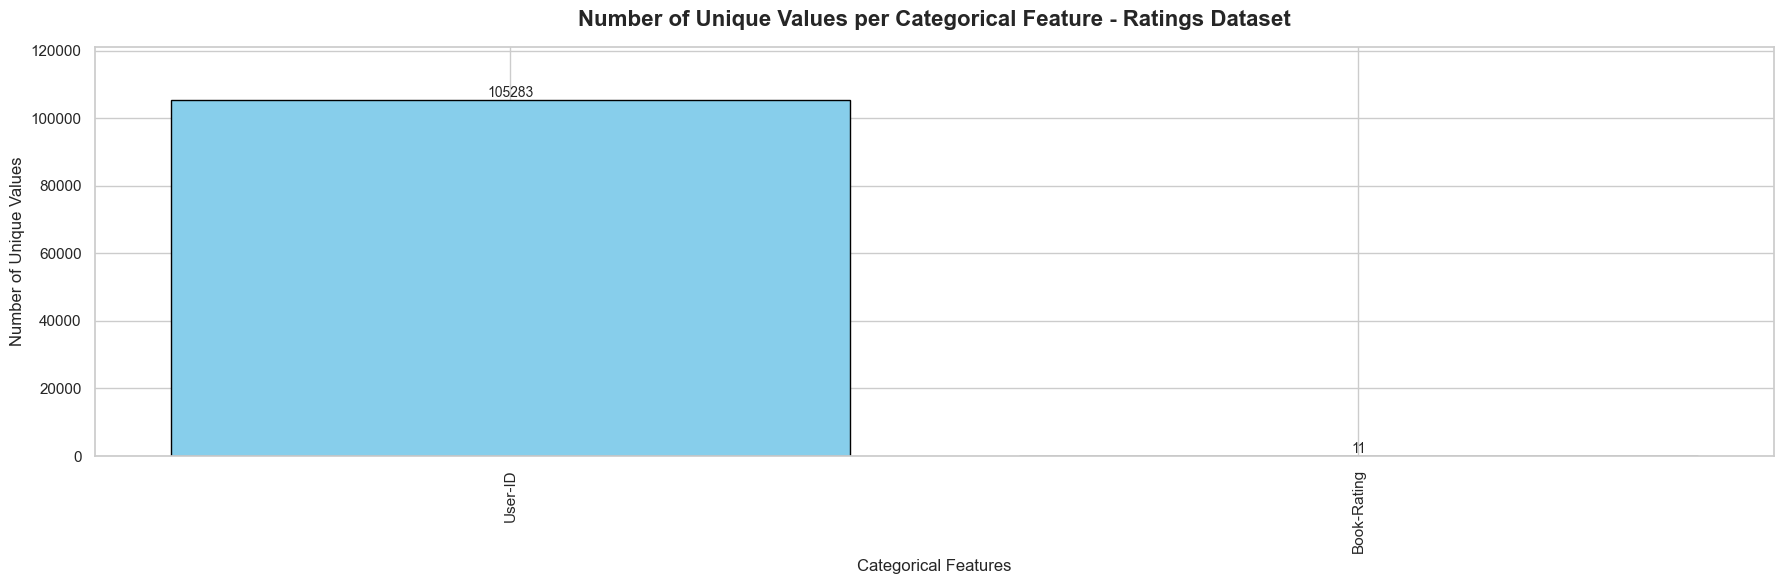

In [43]:
plot_number_of_unique_values(ratings_df,int_cols_ratings,"Ratings Dataset")

### 3.3.3. Users Dataset

In [44]:
cat_cols_users, int_cols_users, float_cols_users = get_column_types(users_df)

Categorical variables:
['Location', 'Country_Clean', 'Region', 'City_Clean', 'State_Clean']

Integer variables:
['User-ID']

Real (float) variables:
['Age']


In [45]:
unique_values(users_df)

Column  UniqueValues  TotalValues  UniquePercent
0        User-ID        278858       278858         100.00
1       Location         57339       278858          20.56
2            Age           165       278858           0.06
3  Country_Clean           131       278858           0.05
4     City_Clean            51       278858           0.02
5    State_Clean            50       278858           0.02
6         Region            12       278858           0.00

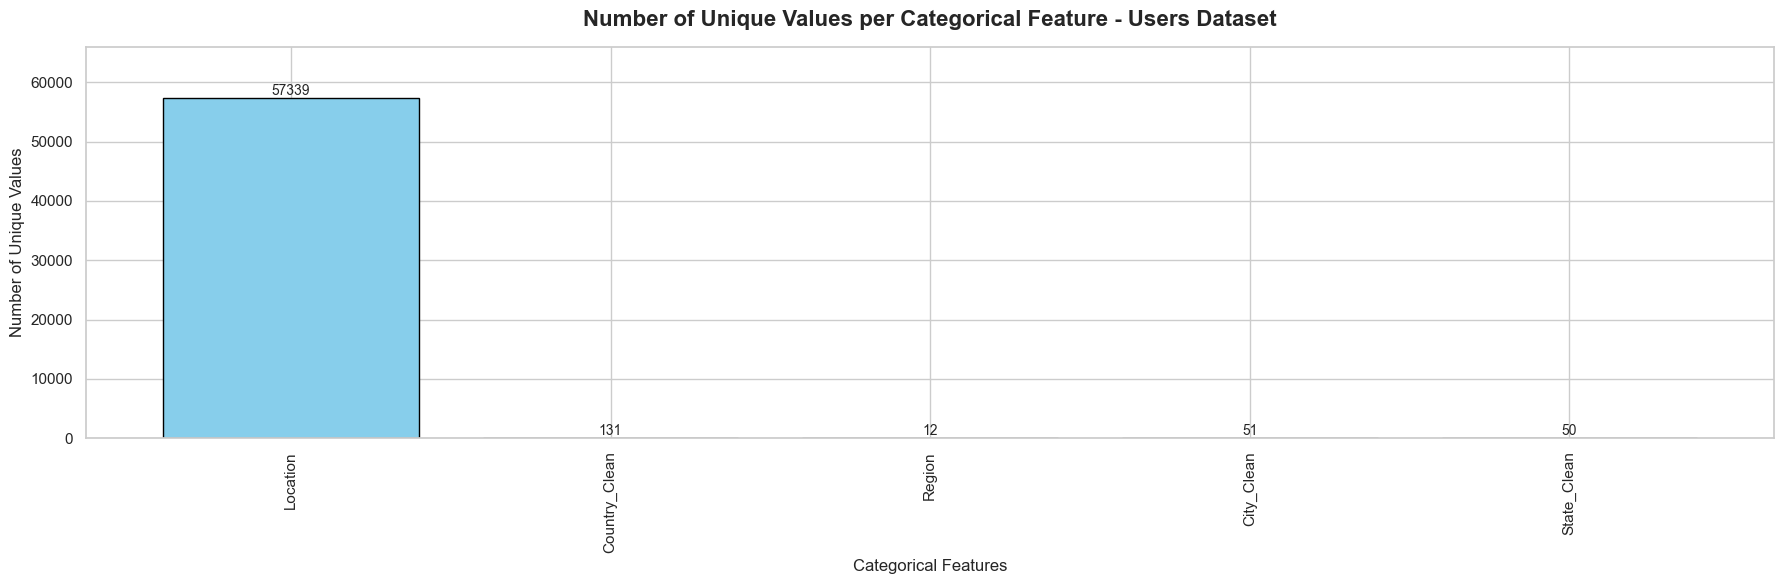

In [46]:
plot_number_of_unique_values(users_df,cat_cols_users,"Users Dataset")

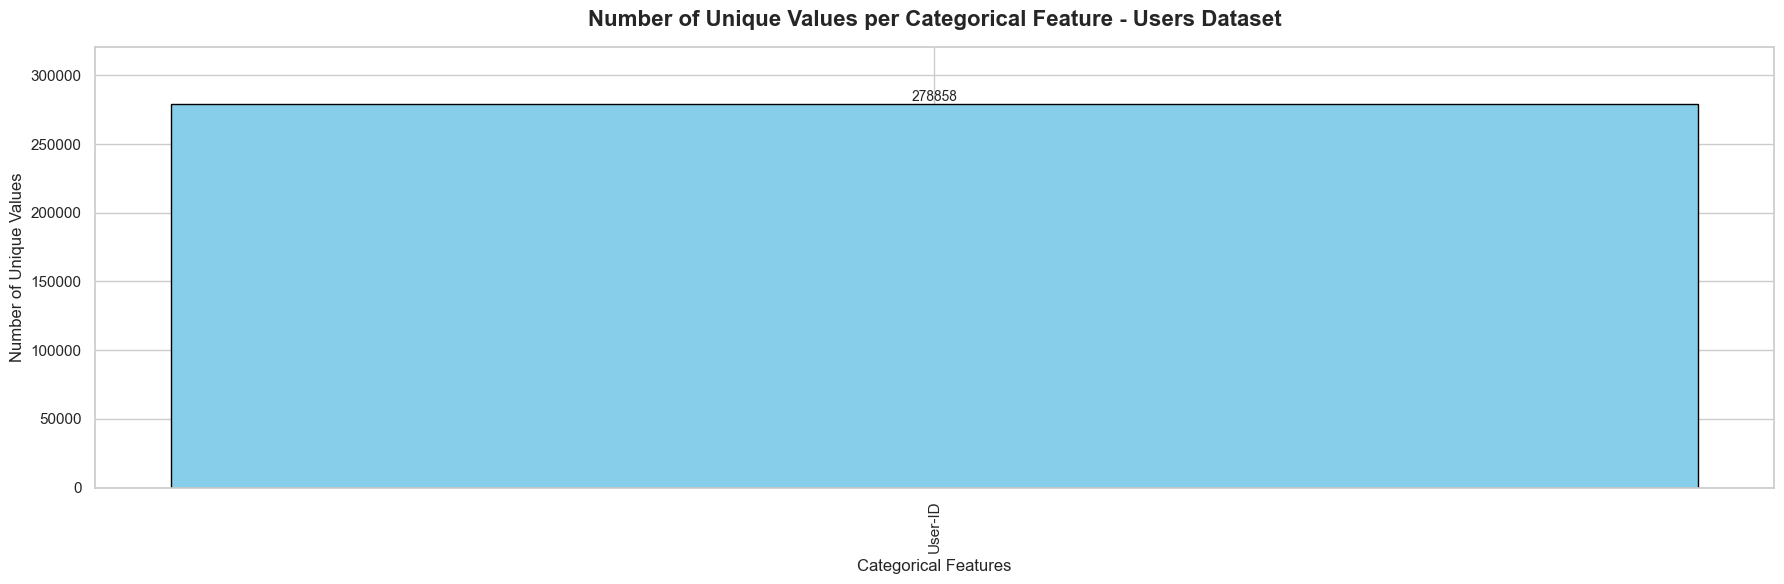

In [47]:
plot_number_of_unique_values(users_df,int_cols_users,"Users Dataset")

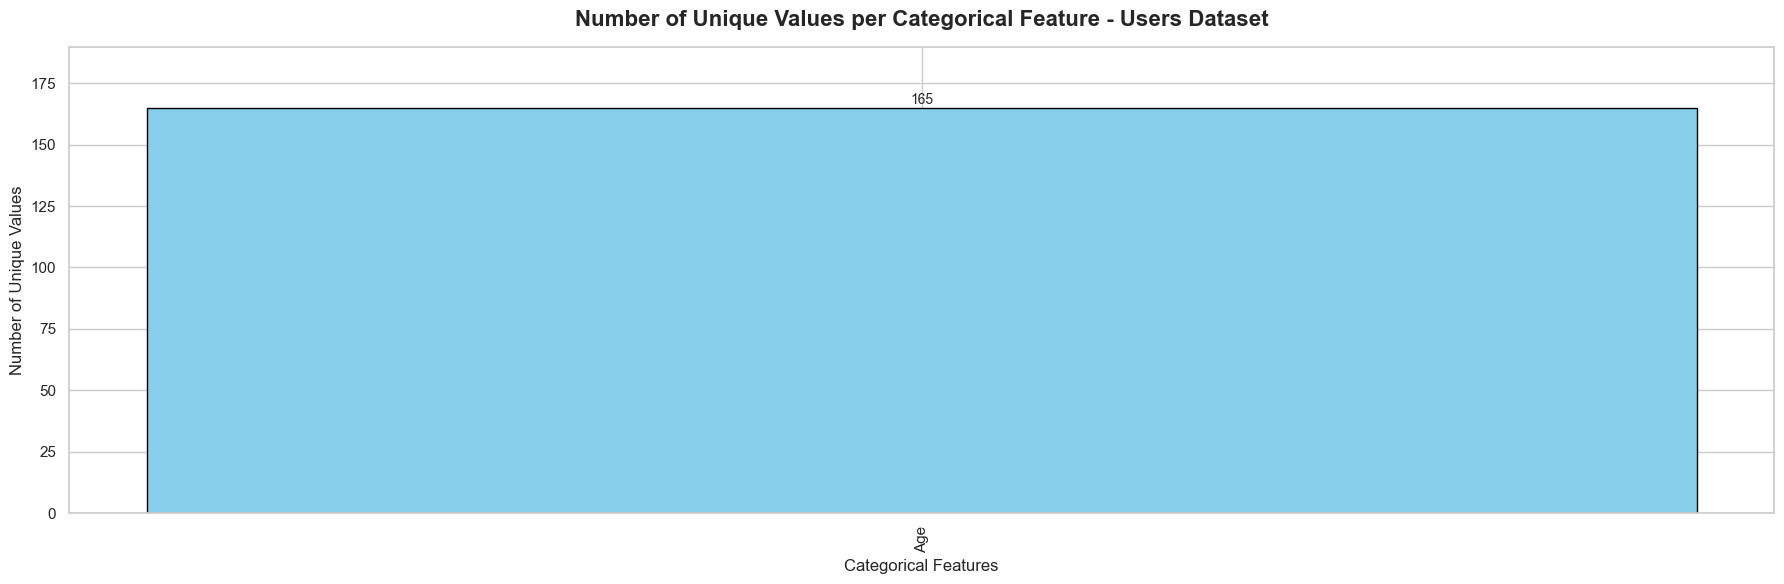

In [48]:
plot_number_of_unique_values(users_df,float_cols_users,"Users Dataset")

# 3.4. Histograms / KDA

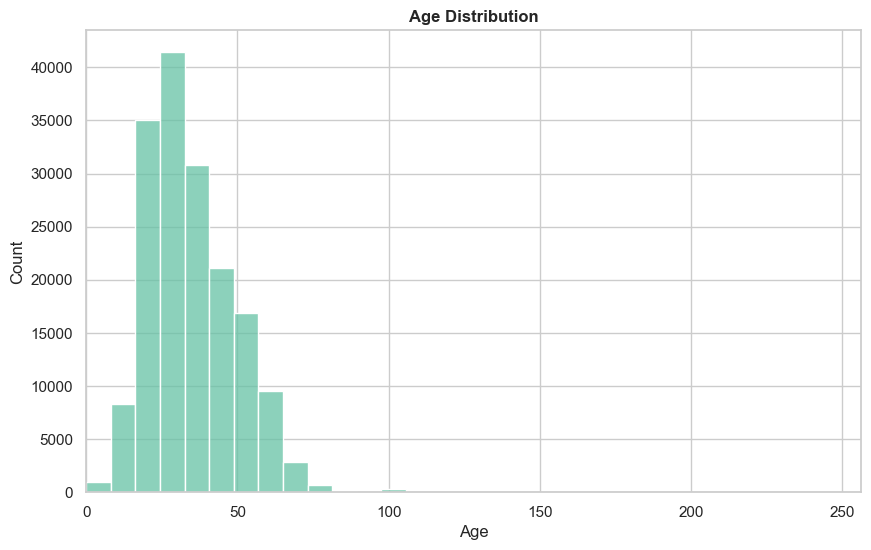

In [84]:
plot_histogram(users_df, 'Age', bins=30, title='Age Distribution')

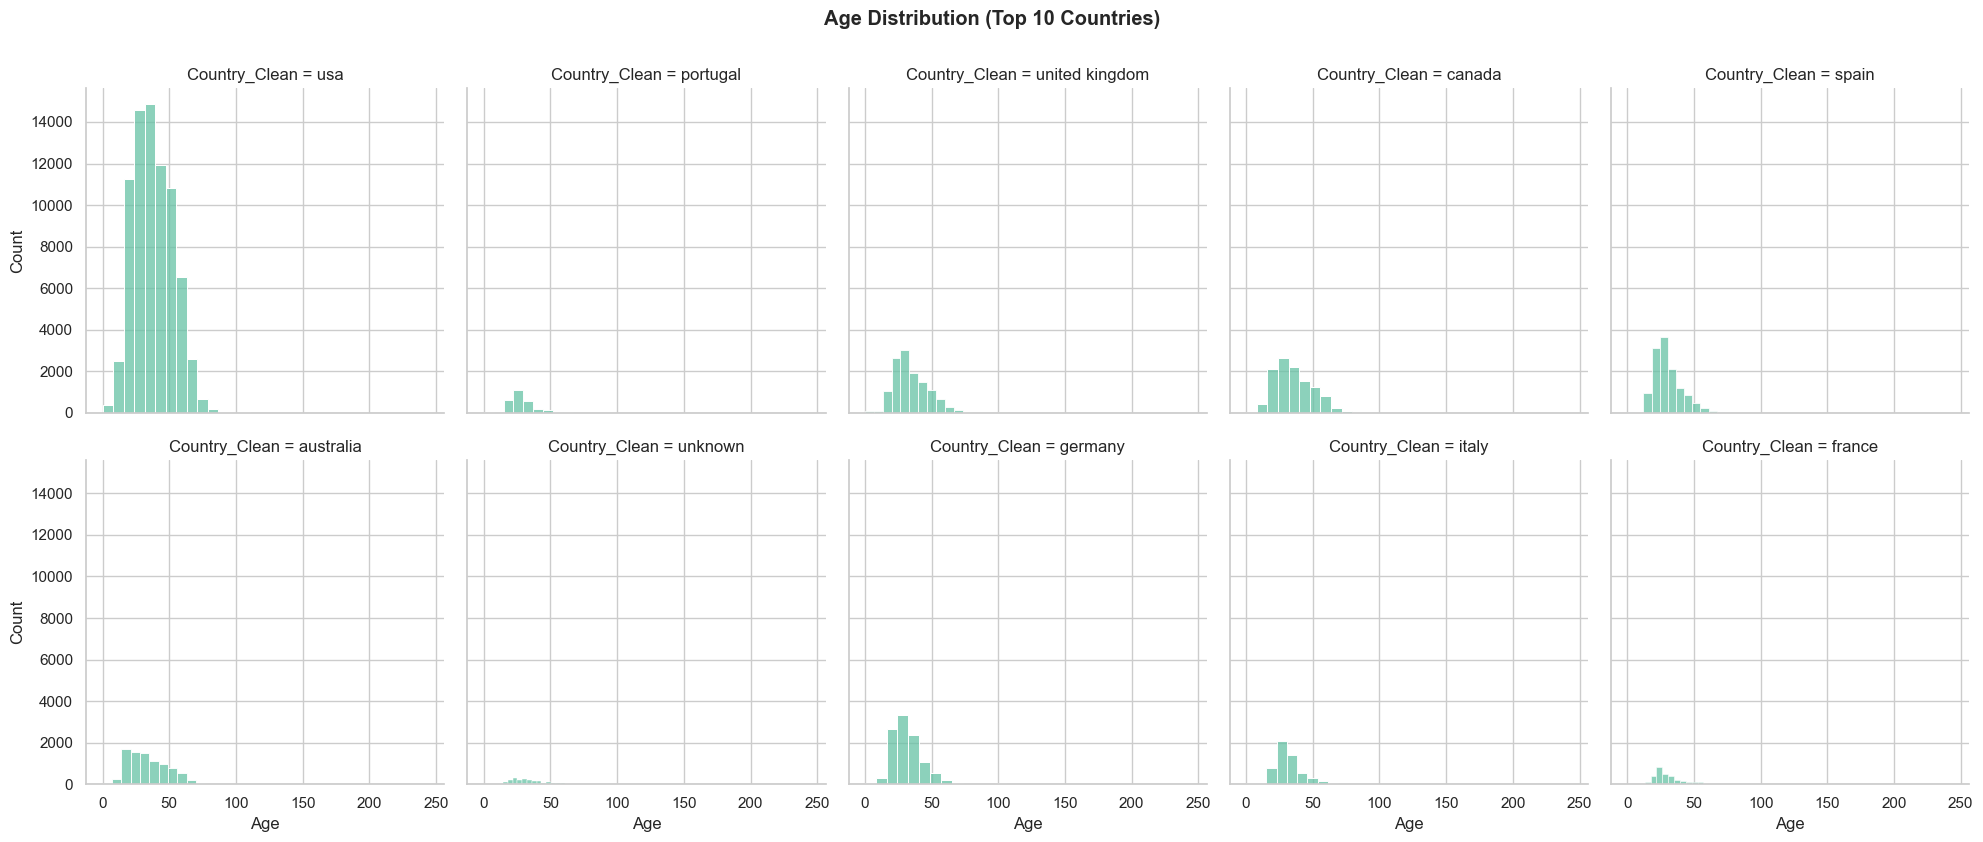

In [88]:
plot_histogram(users_df, 'Age', bins=30, title='Age Distribution (Top 10 Countries)', by='Country_Clean', top_n=10)

In [91]:
ratings_df.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

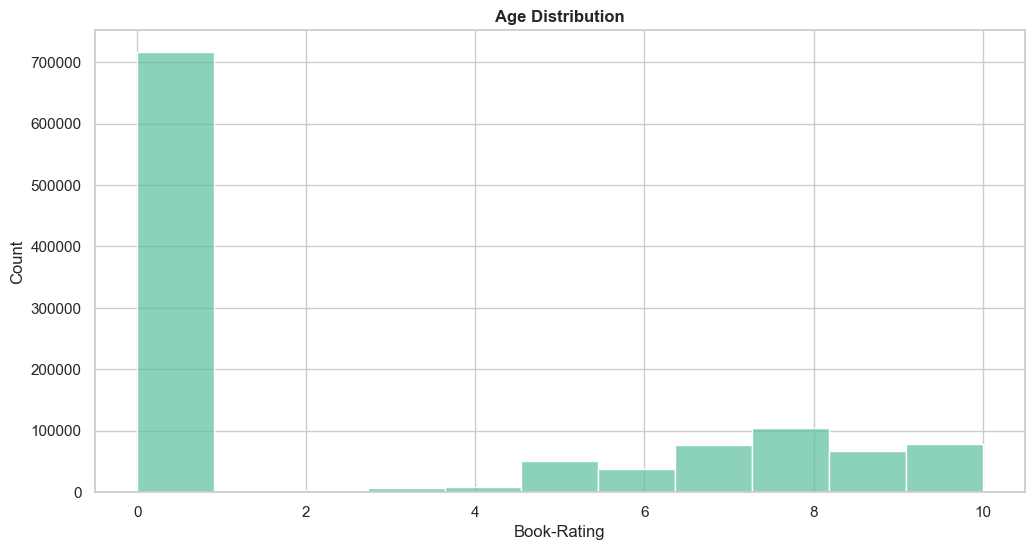

In [93]:
plot_histogram(ratings_df, 'Book-Rating', bins=11, title='Age Distribution')

In [97]:
books_df.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

ValueError: Unable to parse string "DK Publishing Inc" at position 209538

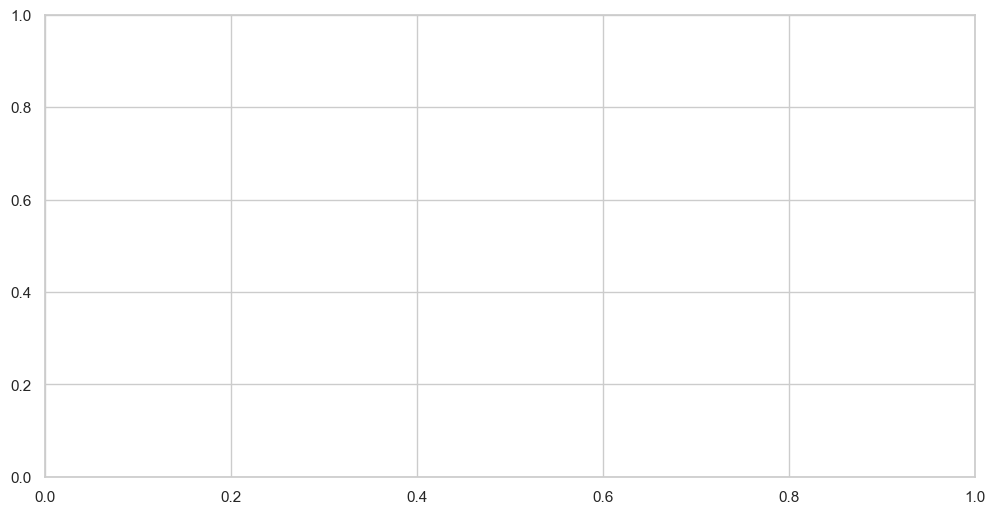

In [99]:
plot_histogram(books_df, 'Year-Of-Publication', bins=51, title='Year')

# 3.5. Boxplots

<string>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



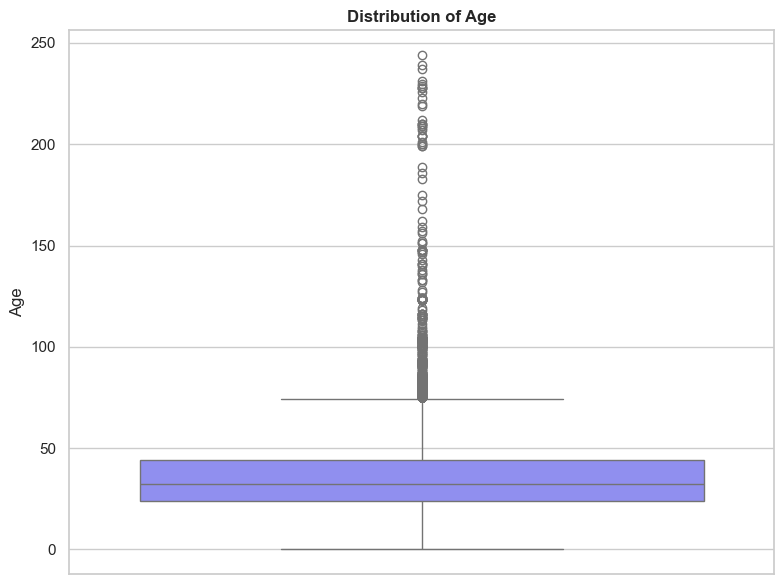

<Axes: title={'center': 'Distribution of Age'}, ylabel='Age'>

In [80]:
plot_boxplot(users_df, 'Age', title='Distribution of Age', ylabel='Age', palette='cool')

<string>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



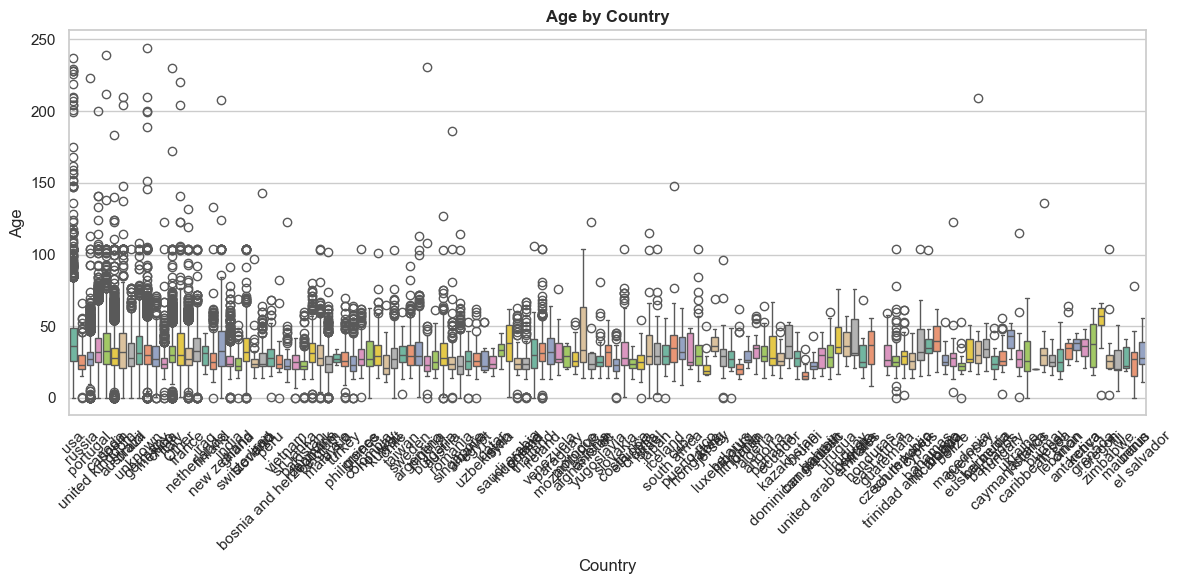

<Axes: title={'center': 'Age by Country'}, xlabel='Country', ylabel='Age'>

In [81]:
plot_boxplot(users_df, 'Age', by='Country_Clean', title='Age by Country', 
             ylabel='Age', xlabel='Country', palette='Set2', rotate_xticks=True, figsize=(12,6))


<string>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



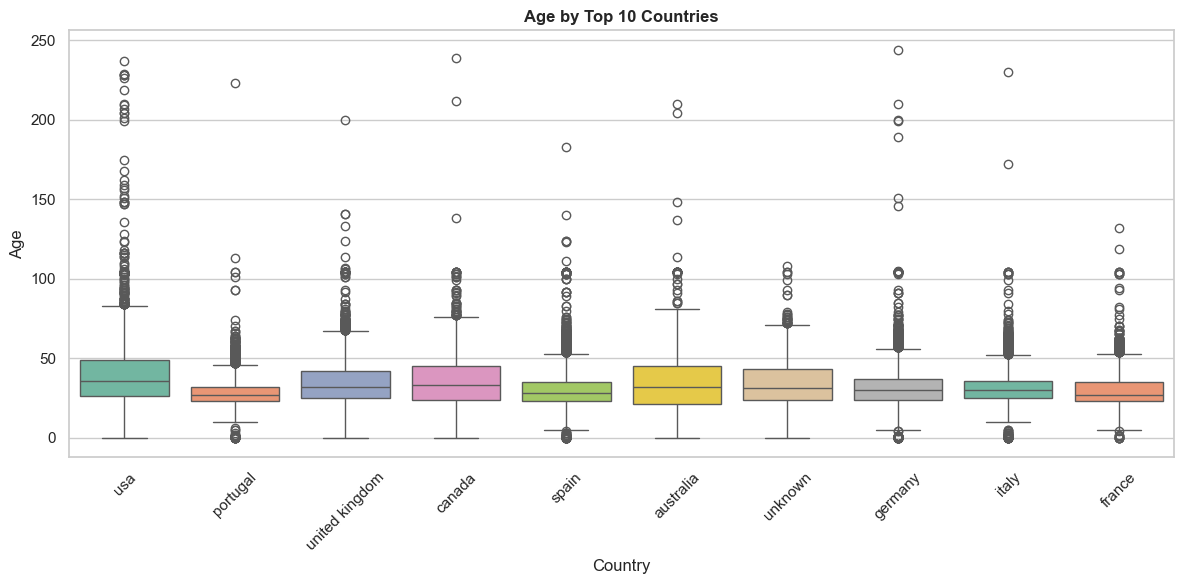

<Axes: title={'center': 'Age by Top 10 Countries'}, xlabel='Country', ylabel='Age'>

In [82]:
# Get top 10 countries by count
top_countries = users_df['Country_Clean'].value_counts().nlargest(10).index

# Filter the DataFrame
df_top10 = users_df[users_df['Country_Clean'].isin(top_countries)]

# Plot only the top 10 countries
plot_boxplot(
    df_top10, 
    column='Age', 
    by='Country_Clean', 
    title='Age by Top 10 Countries', 
    ylabel='Age', 
    xlabel='Country', 
    palette='Set2', 
    rotate_xticks=True, 
    figsize=(12,6)
)

# 3.6. Other charts

### 3.6.1. Country

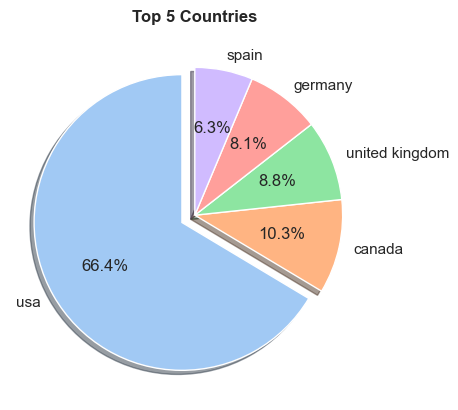

In [49]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['Country_Clean'].value_counts())) - 1)  # highlight first slice

users_df['Country_Clean'].value_counts().iloc[:5].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Countries', fontweight='bold')
plt.ylabel('')
plt.show()

C:\Users\Milos\AppData\Local\Temp\ipykernel_23308\2169871254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country_Clean', data=users_df,


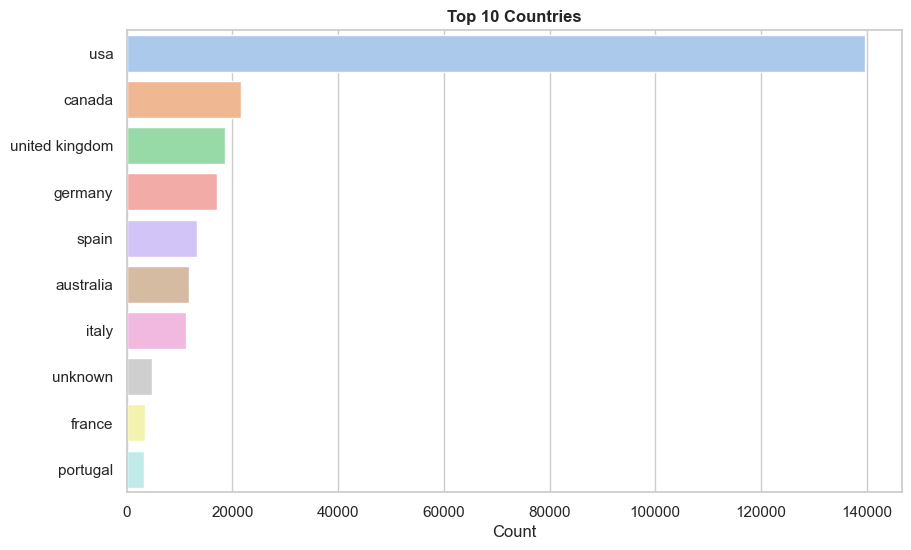

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(y='Country_Clean', data=users_df,
              order=users_df['Country_Clean'].value_counts().iloc[:10].index,
              palette='pastel')
plt.title('Top 10 Countries', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

### 3.6.2. City

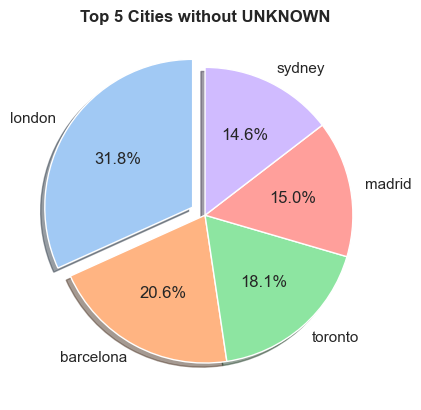

In [55]:
palette_color = sns.color_palette('pastel')
explode = [0.1] + [0]*(min(5, len(users_df['City_Clean'].value_counts())) - 1)  # highlight first slice

users_df['City_Clean'].value_counts().iloc[1:6].plot(
    kind='pie',
    colors=palette_color,
    autopct='%.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title('Top 5 Cities without UNKNOWN', fontweight='bold')
plt.ylabel('')
plt.show()

C:\Users\Milos\AppData\Local\Temp\ipykernel_23308\793619626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City_Clean', data=users_df,


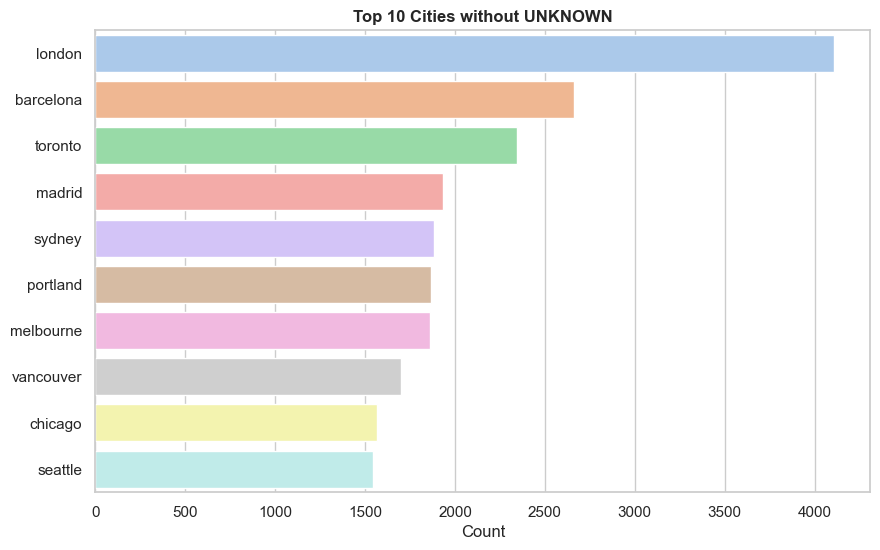

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(y='City_Clean', data=users_df,
              order=users_df['City_Clean'].value_counts().iloc[1:11].index,
              palette='pastel')
plt.title('Top 10 Cities without UNKNOWN', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

C:\Users\Milos\AppData\Local\Temp\ipykernel_23308\3555494279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='City_Clean', data=users_df,


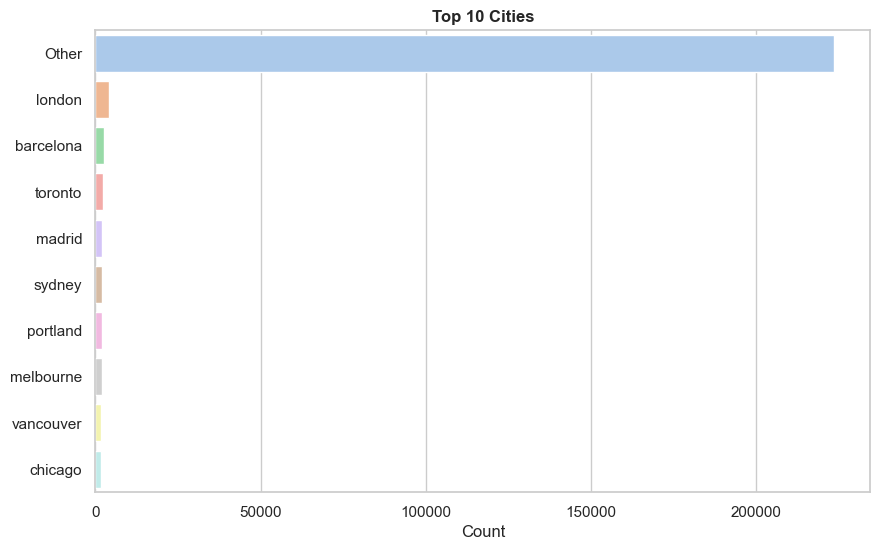

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(y='City_Clean', data=users_df,
              order=users_df['City_Clean'].value_counts().iloc[:10].index,
              palette='pastel')
plt.title('Top 10 Cities', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

In [63]:
ratings_df.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

# RESI OVU FUNKCIJU

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)


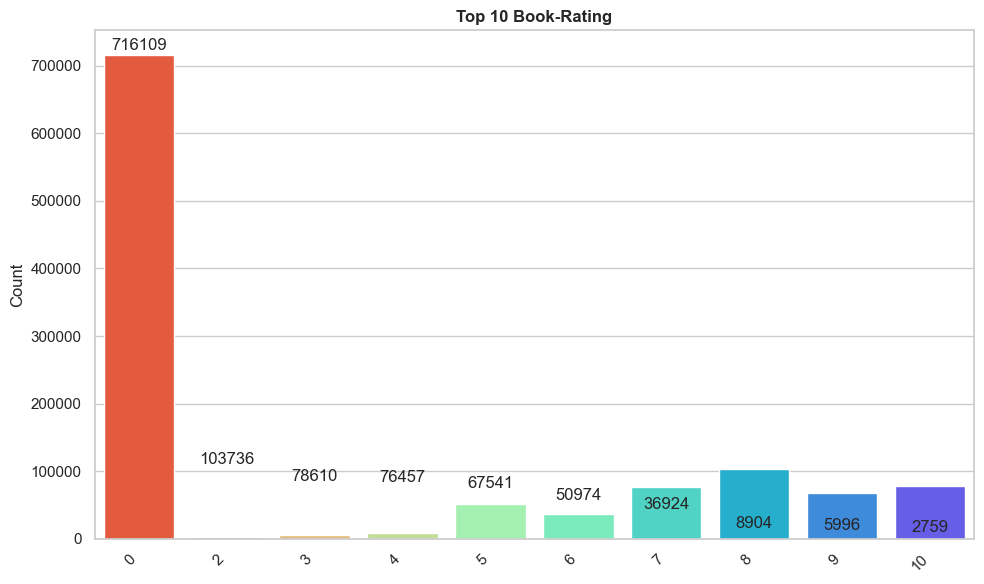

In [69]:
plot_top_categories(ratings_df, 'Book-Rating', top_n=10, orientation='v', palette='rainbow_r')

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=palette)


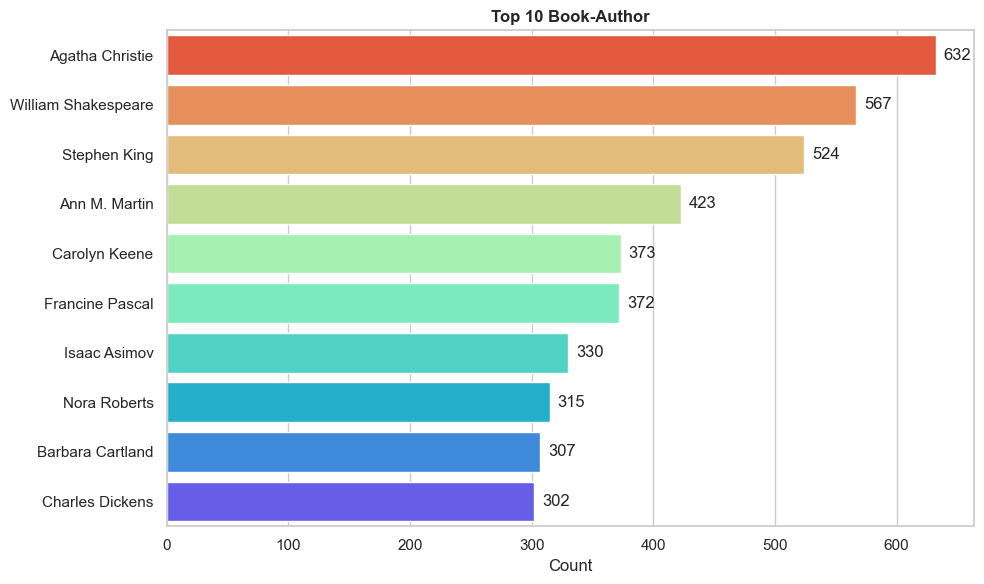

In [66]:
plot_top_categories(books_df, 'Book-Author', top_n=10, orientation='h', palette='rainbow_r')

In [71]:
books_df.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

c:\Users\Milos\Desktop\ESCAPE_9-5\PYTHON\GitHub_Kaggle_Projects\what-else-should-I-read\src\plots.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=palette)


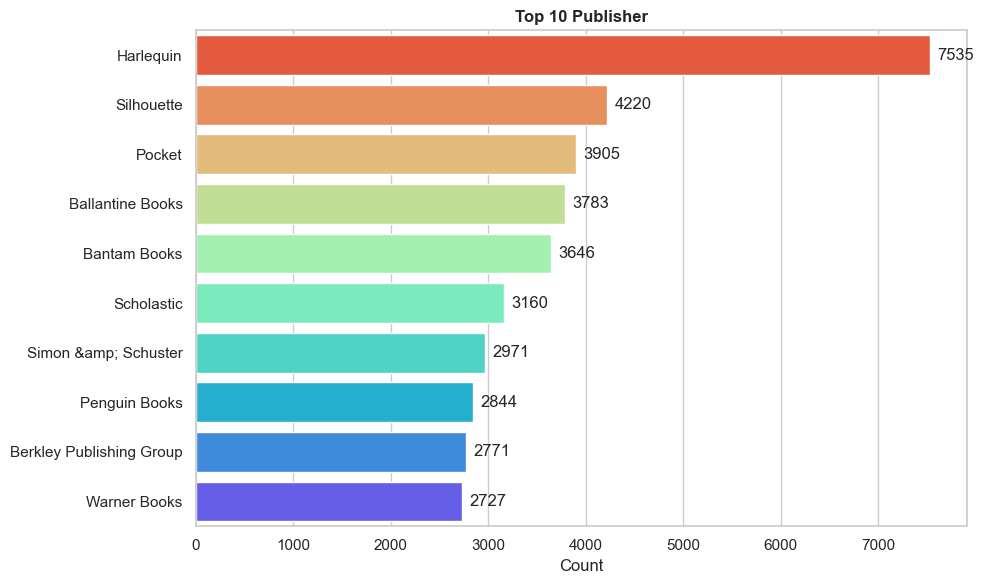

In [73]:
plot_top_categories(books_df, 'Publisher', top_n=10, orientation='h', palette='rainbow_r')